In [32]:
import os
import folderstats
import matplotlib.pyplot as plt
import squarify
import numpy as np

folder = '/home/arnold/raindrop-detection-cnn/ALL/'
filepaths = [os.path.join(folder, f) for f in os.listdir(folder)]

#print(os.stat(folder))

df = folderstats.folderstats(folder, ignore_hidden=True)

#only look at folders
df[df['folder']]


,id,path,name,extension,size,atime,mtime,ctime,folder,num_files,depth,parent,uid
35,2,/home/arnold/raindrop-detection-cnn/ALL/rain,rain,None,2466652,2020-10-07 15:11:26,2020-10-07 15:11:26,2020-10-07 15:11:26,True,35.0,1,1,501
1249,38,/home/arnold/raindrop-detection-cnn/ALL/overcast,overcast,None,107813235,2020-10-07 15:36:21,2020-10-07 15:32:25,2020-10-07 15:32:25,True,1213.0,1,1,501
1492,1252,/home/arnold/raindrop-detection-cnn/ALL/clear,clear,None,31609568,2020-10-07 15:38:05,2020-10-07 15:32:25,2020-10-07 15:32:25,True,242.0,1,1,501
2368,1495,/home/arnold/raindrop-detection-cnn/ALL/few,few,None,100138362,2020-10-07 15:41:10,2020-10-07 15:31:21,2020-10-07 15:31:21,True,875.0,1,1,501
3764,2371,/home/arnold/raindrop-detection-cnn/ALL/scattered,scattered,None,158663524,2020-10-07 15:31:59,2020-10-07 15:31:58,2020-10-07 15:31:58,True,1395.0,1,1,501
4097,3767,/home/arnold/raindrop-detection-cnn/ALL/night,night,None,31738548,2020-10-07 15:38:33,2020-10-07 15:25:28,2020-10-07 15:25:28,True,332.0,1,1,501
4178,4100,/home/arnold/raindrop-detection-cnn/ALL/snow,snow,None,5649295,2020-10-07 15:03:08,2020-10-07 15:02:45,2020-10-07 15:02:45,True,80.0,1,1,501
4179,1,/home/arnold/raindrop-detection-cnn/ALL/,,None,438316752,2020-10-06 20:58:11,2020-10-06 20:36:49,2020-10-06 20:57:58,True,4172.0,0,0,501


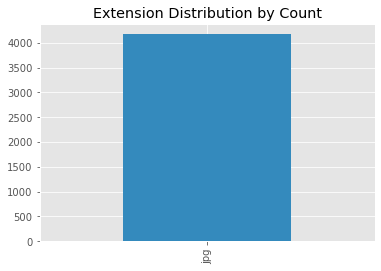

In [25]:
#show distribution by file extension
with plt.style.context('ggplot'):
    df['extension'].value_counts().plot(
        kind='bar', color='C1', title='Extension Distribution by Count');

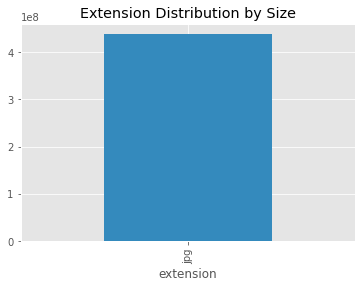

In [24]:
#show distribution by file size
with plt.style.context('ggplot'):
    # Group by extension and sum all sizes for each extension 
    extension_sizes = df.groupby('extension')['size'].sum()
    # Sort elements by size
    extension_sizes = extension_sizes.sort_values(ascending=False)
    
    extension_sizes.plot(
        kind='bar', color='C1', title='Extension Distribution by Size');

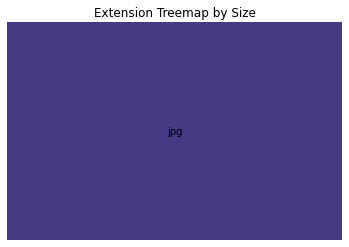

In [23]:
#Tree map

# Group by extension and sum all sizes for each extension
extension_sizes = df.groupby('extension')['size'].sum()
# Sort elements by size
extension_sizes = extension_sizes.sort_values(ascending=False)

squarify.plot(sizes=extension_sizes.values, label=extension_sizes.index.values)
plt.title('Extension Treemap by Size')
plt.axis('off');

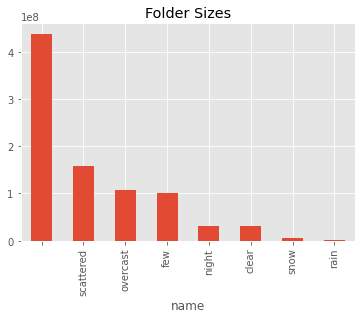

In [20]:
with plt.style.context('ggplot'):
    # Filter the data set to only folders
    df_folders = df[df['folder']]
    # Set the name to be the index (so we can use it as a label later)
    df_folders.set_index('name', inplace=True)
    # Sort the folders by size
    df_folders = df_folders.sort_values(by='size', ascending=False)
    
    # Show the size of the largest 50 folders as a bar plot
    df_sizes['size'][:50].plot(kind='bar', color='C0', title='Folder Sizes');

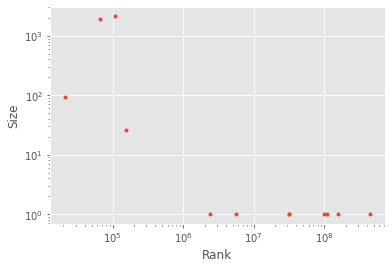

In [27]:
with plt.style.context('ggplot'):
    y, bins = np.histogram(df['size'], bins=10000)
    plt.loglog(bins[:-1], y, '.');
    plt.ylabel('Size')
    plt.xlabel('Rank')


In [29]:
import networkx as nx

# Sort the index
df_sorted = df.sort_values(by='id')

G = nx.Graph()
for i, row in df_sorted.iterrows():
    if row.parent:
        G.add_edge(row.id, row.parent)
    
# Print some additional information
#nodes (files and folders)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 4180
Number of edges: 4179
Average degree:   1.9995


In [30]:
from networkx.drawing.nx_pydot import graphviz_layout

pos_dot = graphviz_layout(G, prog='dot')

fig = plt.figure(figsize=(16, 8))
nodes = nx.draw_networkx_nodes(G, pos_dot, node_size=2, node_color='C0')
edges = nx.draw_networkx_edges(G, pos_dot, edge_color='C0', width=0.5)
plt.axis('off');

FileNotFoundError: [Errno 2] "dot" not found in path.

In [31]:
pos_twopi = graphviz_layout(G, prog='twopi', root=1)

fig = plt.figure(figsize=(14, 14))
nodes = nx.draw_networkx_nodes(G, pos_twopi, node_size=2, node_color='C0')
edges = nx.draw_networkx_edges(G, pos_twopi, edge_color='C0', width=0.5)
plt.axis('off')
plt.axis('equal');

FileNotFoundError: [Errno 2] "twopi" not found in path.